In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
combined_data_together_overall = pd.read_excel("Monthly Data.xlsx", usecols=lambda x: 'Unnamed' not in x)
combined_data_together_overall

,Year_Month,live births no.,Total Infant Deaths,number of marriages,CPI values(seasonally adjusted),CPI values(non-seasonally adjusted),"Inflation(CPI % change from previous month, seasonally adjusted)","Inflation(CPI % change from previous month, non-seasonally adjusted)",Resale House Avg Price,Resale Houses Sold
0,1960-01-01,4981,157,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1960-02-01,4596,154,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1960-03-01,4964,189,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1960-04-01,4904,193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1960-05-01,5244,235,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
751,2022-08-01,3005,7,1138.0,109.679,109.863,0.004736,0.009436,550441.032430,2309.0
752,2022-09-01,3272,7,2211.0,110.154,110.339,0.004331,0.004333,564887.631008,2580.0
753,2022-10-01,3109,4,2024.0,110.223,109.893,0.000626,-0.004042,568734.051469,1960.0
754,2022-11-01,2943,7,2445.0,110.773,110.959,0.004990,0.009700,557752.336304,2132.0


## Plotting the Data

<AxesSubplot:xlabel='Year_Month'>

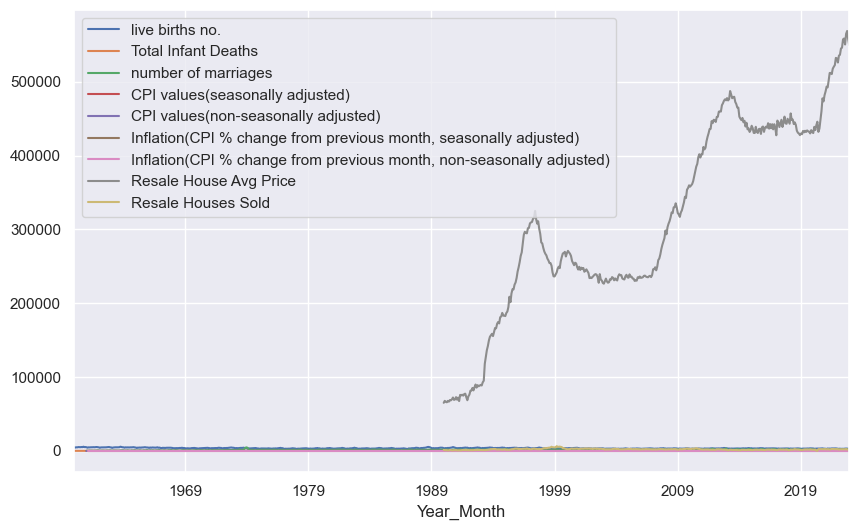

In [3]:
combined_data_together_overall.plot(x="Year_Month", y=["live births no.", "Total Infant Deaths", "number of marriages", "CPI values(seasonally adjusted)", "CPI values(non-seasonally adjusted)", "Inflation(CPI % change from previous month, seasonally adjusted)", "Inflation(CPI % change from previous month, non-seasonally adjusted)", "Resale House Avg Price", "Resale Houses Sold"], figsize=(10, 6))

In [4]:
combined_data_together_overall.describe()

,live births no.,Total Infant Deaths,number of marriages,CPI values(seasonally adjusted),CPI values(non-seasonally adjusted),"Inflation(CPI % change from previous month, seasonally adjusted)","Inflation(CPI % change from previous month, non-seasonally adjusted)",Resale House Avg Price,Resale Houses Sold
count,756.000000,756.000000,744.000000,744.000000,744.000000,743.000000,743.000000,396.000000,396.000000
mean,3725.199735,40.884921,1477.641129,63.463437,63.463523,0.002068,0.002060,312473.652115,2246.484848
std,594.373596,45.268924,556.123205,25.250357,25.250168,0.006140,0.007039,130900.961894,899.542135
min,2632.000000,0.000000,176.000000,24.246000,24.053000,-0.019657,-0.019080,65214.120770,363.000000
25%,3281.250000,9.000000,1164.750000,42.303750,42.277000,-0.001015,-0.001577,234349.201590,1650.000000
50%,3585.500000,22.000000,1529.500000,65.675000,65.661000,0.001389,0.001531,285877.139727,2195.000000
75%,4070.000000,49.250000,1802.500000,78.959750,78.892250,0.004489,0.005007,437031.099319,2662.250000
max,5761.000000,235.000000,4877.000000,111.000000,111.186000,0.044555,0.047563,568734.051469,6465.000000


## Normalising the Data for Easier Visualisation

In [5]:
## Normalise!!
from sklearn.preprocessing import MinMaxScaler

In [6]:
## Normalise!!
combined_data_together_overall_normalised = pd.DataFrame(combined_data_together_overall.iloc[:,0].copy())
for cols in range(1, combined_data_together_overall.shape[1]):
    values = combined_data_together_overall.iloc[:,cols].values
    values = values.reshape((len(values)), 1)
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler = scaler.fit(values)
    normalized = scaler.transform(values)
    normalized_df = pd.DataFrame(normalized, columns=[combined_data_together_overall.columns.values[cols]])
    combined_data_together_overall_normalised = combined_data_together_overall_normalised.join(normalized_df)
#combined_data_together_overall
combined_data_together_overall_normalised

,Year_Month,live births no.,Total Infant Deaths,number of marriages,CPI values(seasonally adjusted),CPI values(non-seasonally adjusted),"Inflation(CPI % change from previous month, seasonally adjusted)","Inflation(CPI % change from previous month, non-seasonally adjusted)",Resale House Avg Price,Resale Houses Sold
0,1960-01-01,0.750719,0.668085,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1960-02-01,0.627677,0.655319,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1960-03-01,0.745286,0.804255,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1960-04-01,0.726111,0.821277,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1960-05-01,0.834771,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
751,2022-08-01,0.119207,0.029787,0.204637,0.984773,0.984816,0.379880,0.427890,0.963670,0.318912
752,2022-09-01,0.204538,0.029787,0.432887,0.990248,0.990279,0.373569,0.351309,0.992361,0.363324
753,2022-10-01,0.152445,0.017021,0.393108,0.991044,0.985161,0.315879,0.225642,1.000000,0.261717
754,2022-11-01,0.099393,0.029787,0.482663,0.997383,0.997395,0.383833,0.431853,0.978190,0.289905


<AxesSubplot:xlabel='Year_Month'>

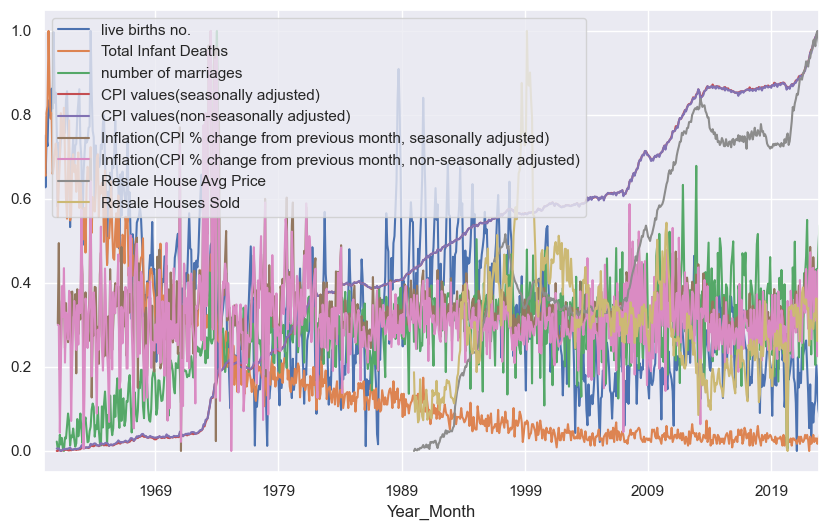

In [7]:
combined_data_together_overall_normalised.plot(x="Year_Month", y=["live births no.", "Total Infant Deaths", "number of marriages", "CPI values(seasonally adjusted)", "CPI values(non-seasonally adjusted)", "Inflation(CPI % change from previous month, seasonally adjusted)", "Inflation(CPI % change from previous month, non-seasonally adjusted)", "Resale House Avg Price", "Resale Houses Sold"], figsize=(10, 6))

<AxesSubplot:xlabel='Year_Month'>

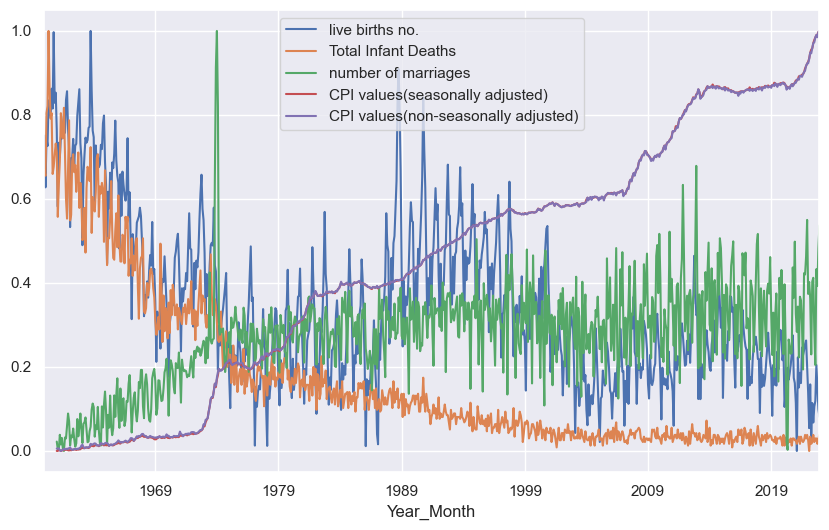

In [8]:
combined_data_together_overall_normalised.plot(x="Year_Month", y=["live births no.", "Total Infant Deaths", "number of marriages", "CPI values(seasonally adjusted)", "CPI values(non-seasonally adjusted)"], figsize=(10, 6))

<AxesSubplot:xlabel='Year_Month'>

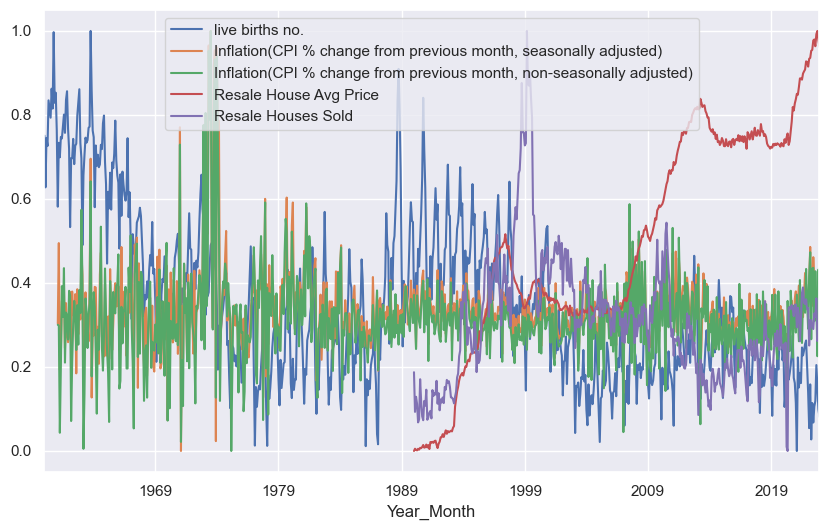

In [9]:
combined_data_together_overall_normalised.plot(x="Year_Month", y=["live births no.", "Inflation(CPI % change from previous month, seasonally adjusted)", "Inflation(CPI % change from previous month, non-seasonally adjusted)", "Resale House Avg Price", "Resale Houses Sold"], figsize=(10, 6))

## Standardising the Data for Easier Visualisation

In [10]:
## Standardise!!
from sklearn.preprocessing import StandardScaler

In [11]:
## Standardise!!
combined_data_together_overall_standardised = pd.DataFrame(combined_data_together_overall.iloc[:,0].copy())
for cols in range(1, combined_data_together_overall.shape[1]):
    values = combined_data_together_overall.iloc[:,cols].values
    values = values.reshape((len(values)), 1)
    scaler = StandardScaler()
    scaler = scaler.fit(values)
    standardised = scaler.transform(values)
    standardised_df = pd.DataFrame(standardised, columns=[combined_data_together_overall.columns.values[cols]])
    combined_data_together_overall_standardised = combined_data_together_overall_standardised.join(standardised_df)
combined_data_together_overall_standardised

,Year_Month,live births no.,Total Infant Deaths,number of marriages,CPI values(seasonally adjusted),CPI values(non-seasonally adjusted),"Inflation(CPI % change from previous month, seasonally adjusted)","Inflation(CPI % change from previous month, non-seasonally adjusted)",Resale House Avg Price,Resale Houses Sold
0,1960-01-01,2.114212,2.566705,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1960-02-01,1.466042,2.500390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1960-03-01,2.085591,3.274059,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1960-04-01,1.984578,3.362479,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1960-05-01,2.556987,4.290882,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
751,2022-08-01,-1.212498,-0.749021,-0.611141,1.831525,1.838827,0.434840,1.048676,1.820219,0.069585
752,2022-09-01,-0.762988,-0.749021,1.319586,1.850349,1.857691,0.368796,0.323108,1.930721,0.371230
753,2022-10-01,-1.037408,-0.815335,0.983103,1.853083,1.840016,-0.234898,-0.867525,1.960143,-0.318881
754,2022-11-01,-1.316878,-0.749021,1.740639,1.874880,1.882262,0.476201,1.086227,1.876143,-0.127431


<AxesSubplot:xlabel='Year_Month'>

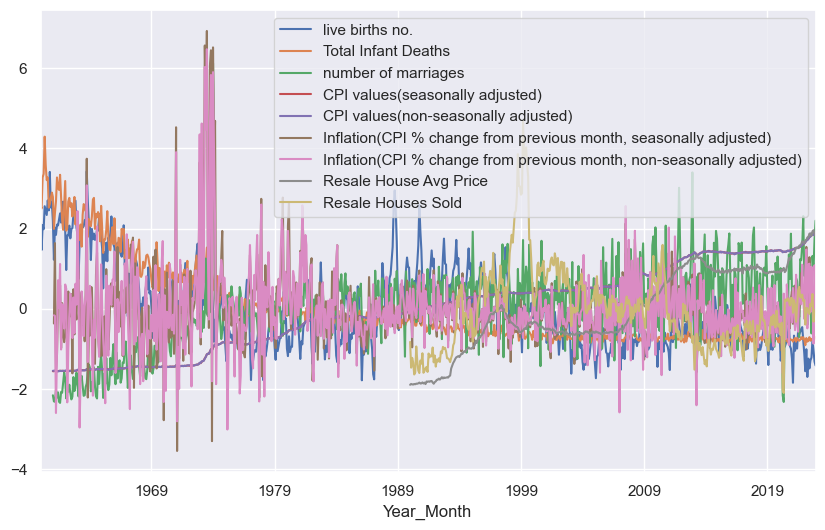

In [12]:
combined_data_together_overall_standardised.plot(x="Year_Month", y=["live births no.", "Total Infant Deaths", "number of marriages", "CPI values(seasonally adjusted)", "CPI values(non-seasonally adjusted)", "Inflation(CPI % change from previous month, seasonally adjusted)", "Inflation(CPI % change from previous month, non-seasonally adjusted)", "Resale House Avg Price", "Resale Houses Sold"], figsize=(10, 6))

<AxesSubplot:xlabel='Year_Month'>

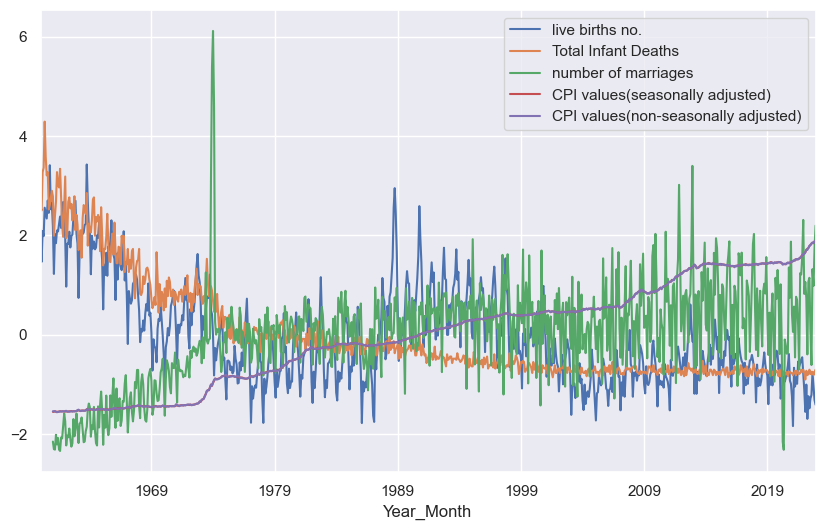

In [13]:
combined_data_together_overall_standardised.plot(x="Year_Month", y=["live births no.", "Total Infant Deaths", "number of marriages", "CPI values(seasonally adjusted)", "CPI values(non-seasonally adjusted)"], figsize=(10, 6))

<AxesSubplot:xlabel='Year_Month'>

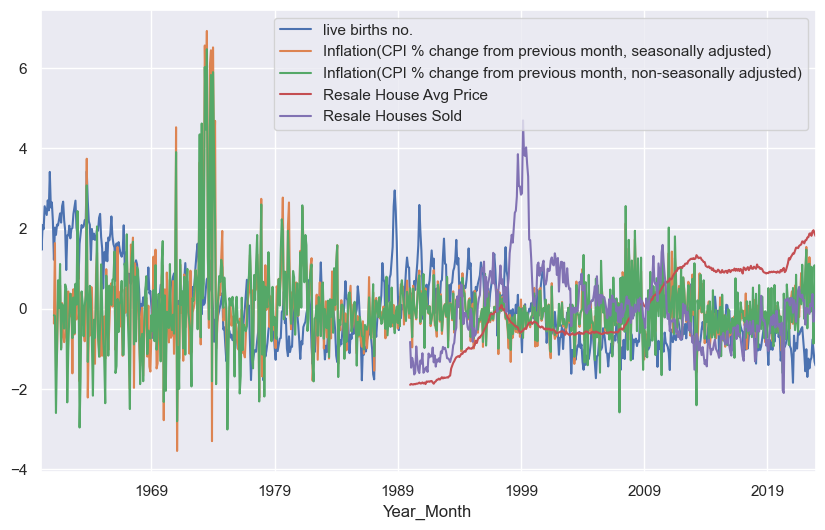

In [14]:
combined_data_together_overall_standardised.plot(x="Year_Month", y=["live births no.", "Inflation(CPI % change from previous month, seasonally adjusted)", "Inflation(CPI % change from previous month, non-seasonally adjusted)", "Resale House Avg Price", "Resale Houses Sold"], figsize=(10, 6))

## Plotting Correlation Heatmap

                                                    live births no.  \
live births no.                                            1.000000   
Total Infant Deaths                                        0.715267   
number of marriages                                       -0.380648   
CPI values(seasonally adjusted)                           -0.557429   
CPI values(non-seasonally adjusted)                       -0.557634   
Inflation(CPI % change from previous month, sea...         0.024613   
Inflation(CPI % change from previous month, non...         0.014378   
Resale House Avg Price                                    -0.537198   
Resale Houses Sold                                        -0.065678   

                                                    Total Infant Deaths  \
live births no.                                                0.715267   
Total Infant Deaths                                            1.000000   
number of marriages                                           -0

<AxesSubplot:>

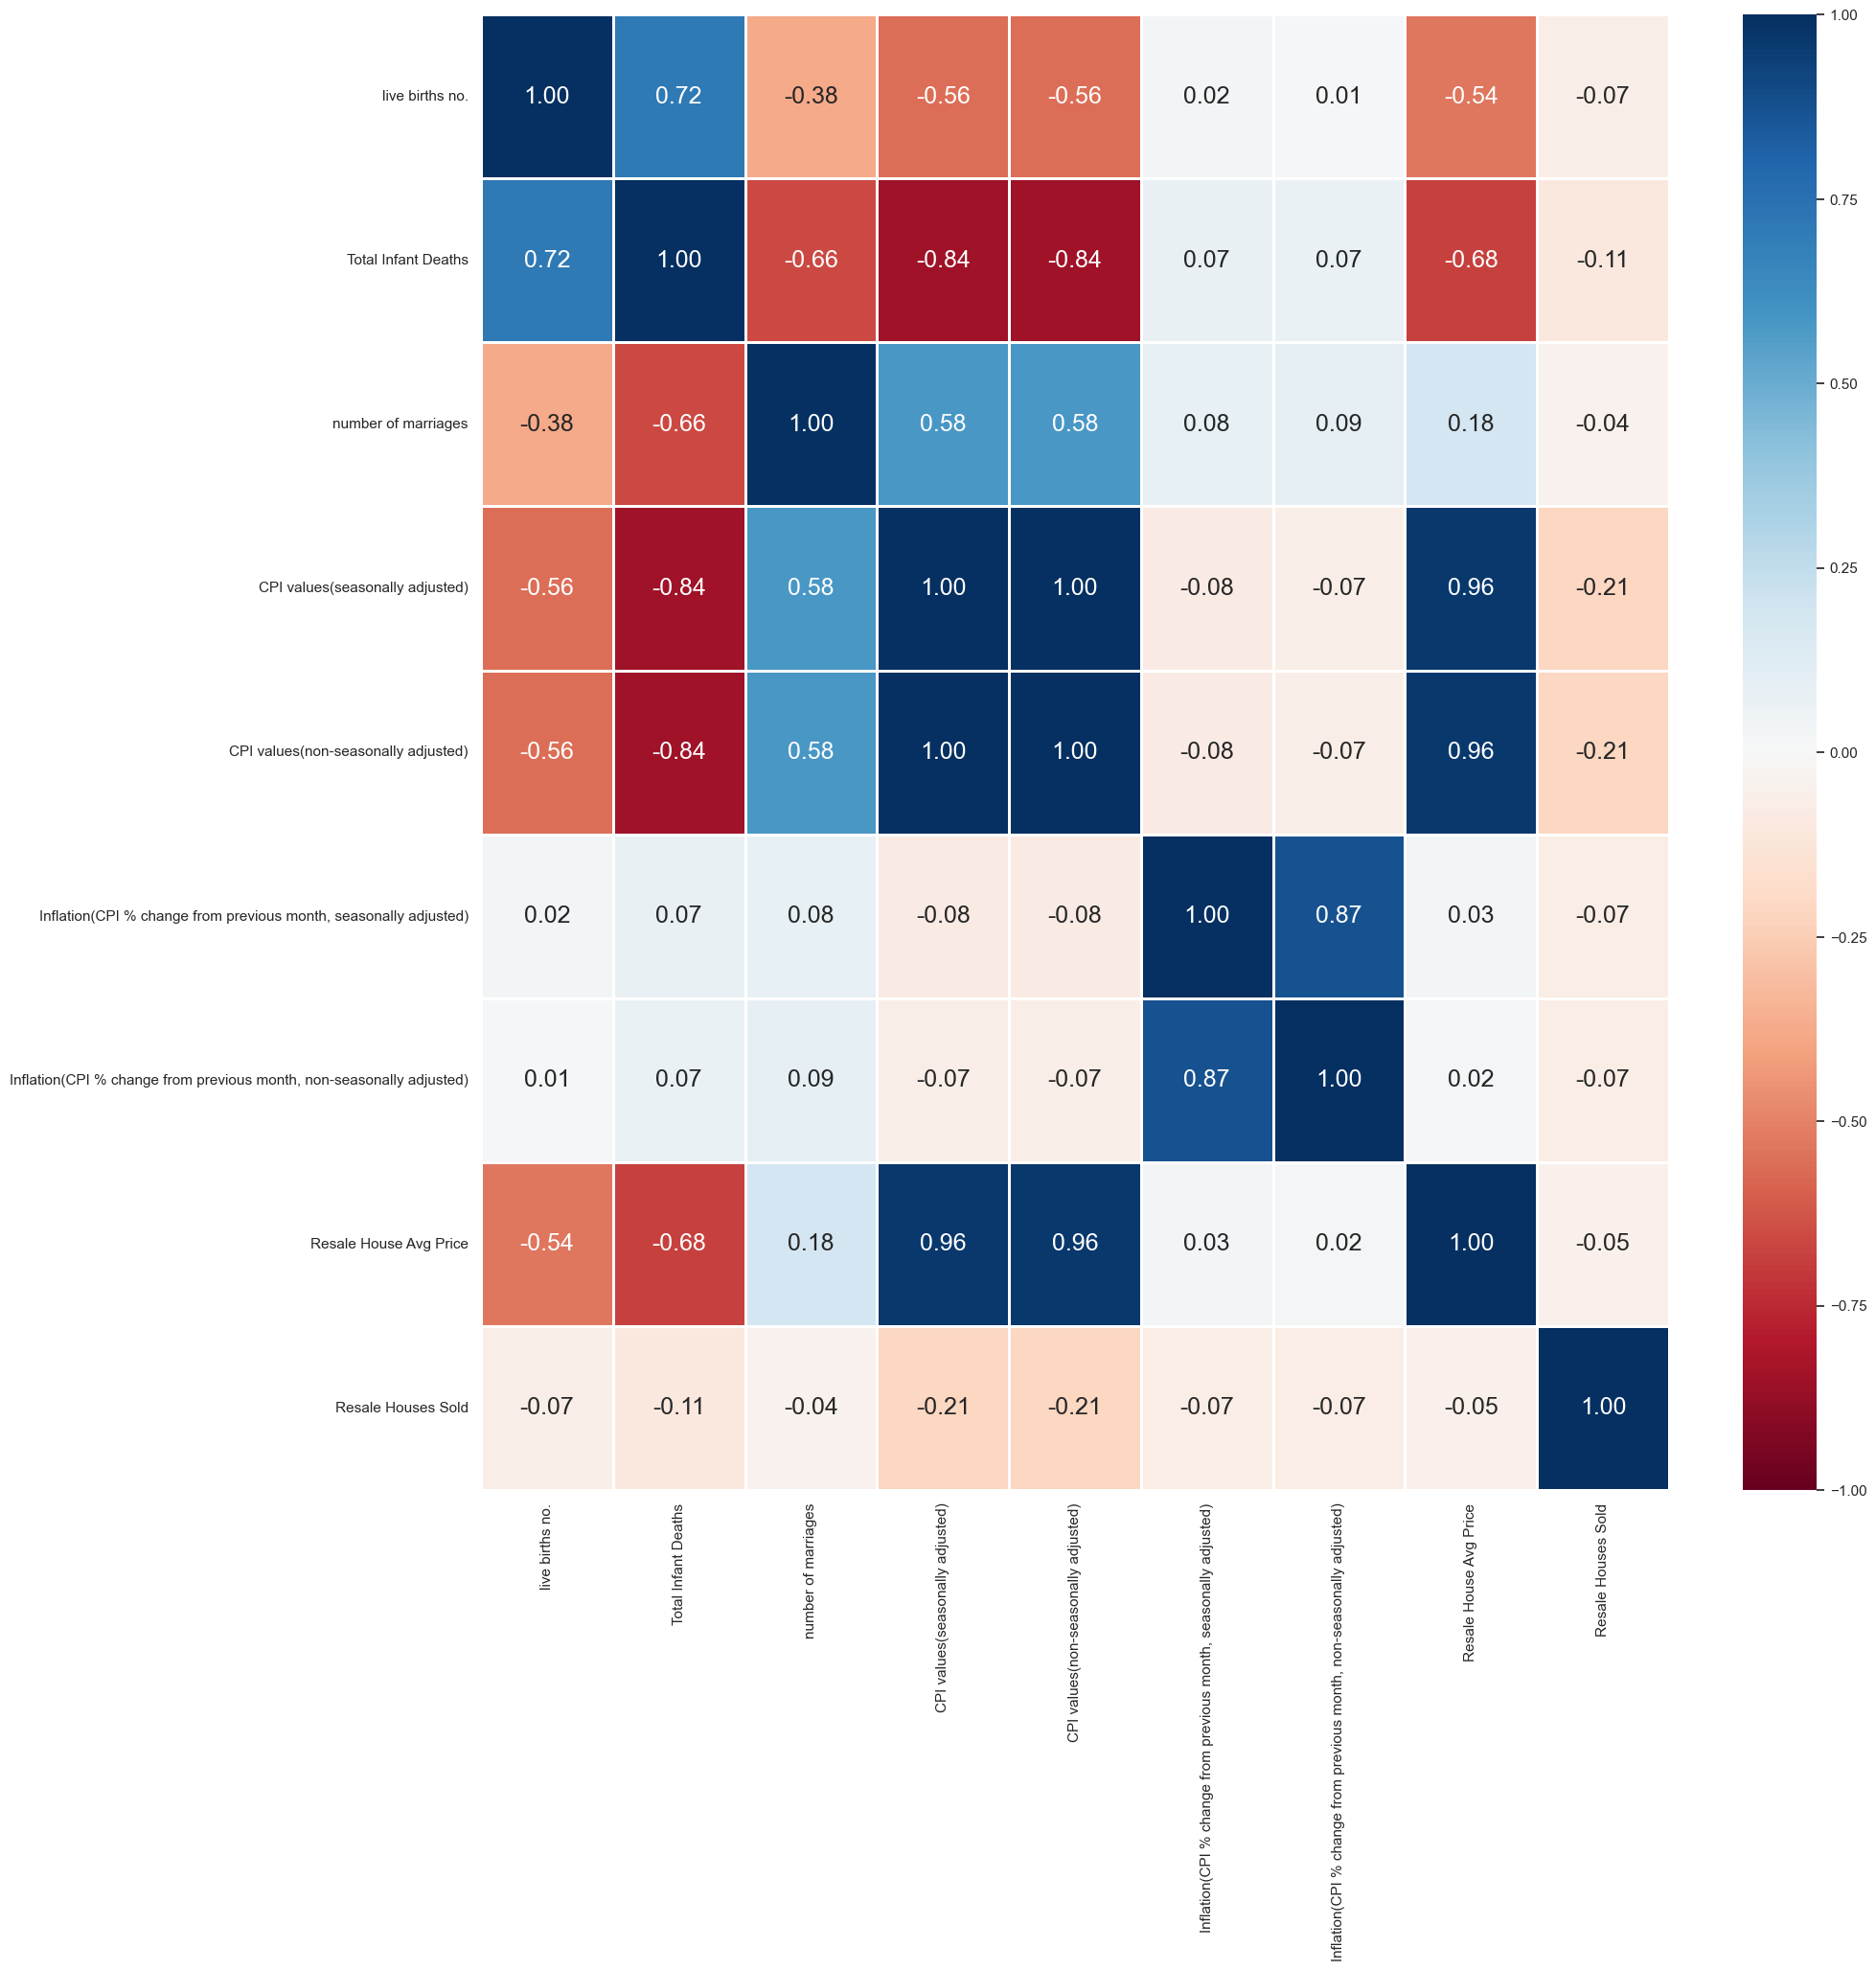

In [15]:
print(combined_data_together_overall.corr())
f = plt.figure(figsize=(20, 20))
sb.heatmap(combined_data_together_overall.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

### Although total infant deaths have a high correlation, it may have in fact been due to live birth numbers, so the causation is the other way around, thus it is not useful as a method to affect the live birth value but knowing it does indeed help us know whether the live birth no. will increase or decrease.